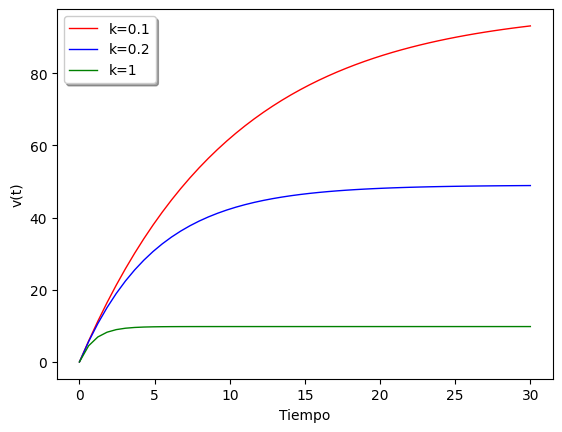

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# función que entrega dv/dt
def modelo(v,t,k):
    dvdt = g - k * v/m
    return dvdt

# condición inicial
v0 = 0

#parámetros
g = 9.8
m = 1 

# valores de tiempo
t = np.linspace(0,30)

# soluciones EDO para distintos k
k = 0.1
v1 = odeint(modelo,v0,t,args=(k,))
k = 0.2
v2 = odeint(modelo,v0,t,args=(k,))
k = 1
v3 = odeint(modelo,v0,t,args=(k,))

# gráfico
plt.plot(t,v1,'r',linewidth=1,label='k=0.1')
plt.plot(t,v2,'b',linewidth=1,label='k=0.2')
plt.plot(t,v3,'g',linewidth=1,label='k=1')
plt.xlabel('Tiempo')
plt.ylabel('v(t)')
plt.legend(shadow=True)
plt.show()

In [2]:
from sympy import symbols, Function, dsolve

# Símbolos
t, g, k , m, v0= symbols("t, g, k, m, v0")

# v es función del tiempo
v = Function('v')(t)

# Derivada de v
dvdt = v.diff(t)

# Ecuación diferencial
eq = dvdt - g + k*v/m

# Solución de la EDO con la condición inicial v(0)=v0
dsolve(eq, v, ics={v.subs(t, 0): v0})

Eq(v(t), g*m/k + (-g*m + k*v0)*exp(-k*t/m)/k)

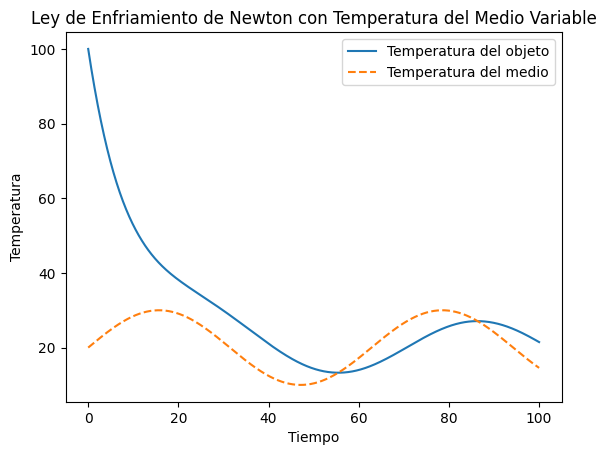

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la ley de enfriamiento de Newton
k = -0.1  # Constante de enfriamiento

# Función que define la temperatura del medio variable en el tiempo
def T_m(t):
    return 20 + 10 * np.sin(0.1 * t)

# Definición de la EDO para la ley de enfriamiento de Newton
def Newton(t, T):
    return k * (T - T_m(t))

# Condición inicial
T0 = 100  # Temperatura inicial del objeto

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver la EDO
sol = solve_ivp(Newton, t_span, [T0], t_eval=t_eval)

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Temperatura del objeto')
plt.plot(sol.t, T_m(sol.t), label='Temperatura del medio', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.title('Ley de Enfriamiento de Newton con Temperatura del Medio Variable')
plt.show()

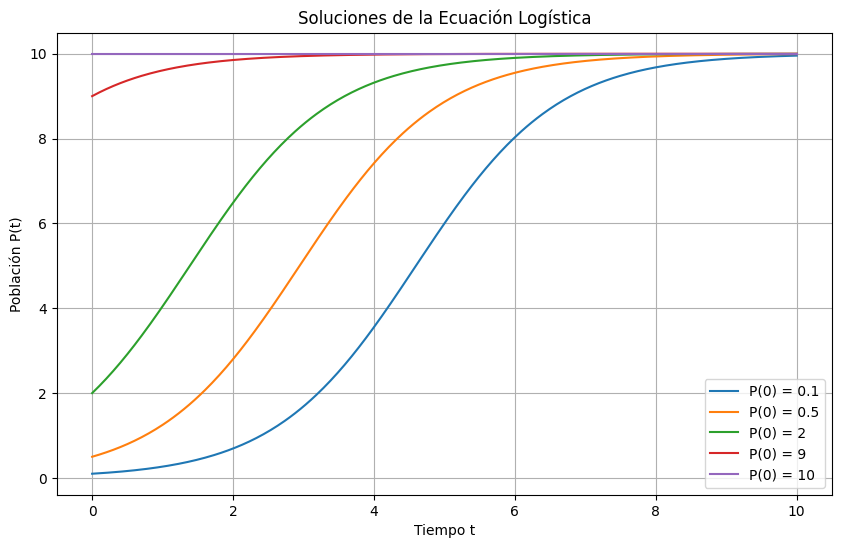

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros de la ecuación
a = 1.0  # Tasa de crecimiento
b = 0.1  # Tasa de competencia

# Ecuación diferencial logística
def logistica_ec(P, t):
    return a * P - b * P**2

# Tiempo para la integración
t = np.linspace(0, 10, 400)

# Condiciones iniciales diferentes
P0_vals = [0.1, 0.5, 2, 9, 10]

# Soluciones para cada condición inicial
sols = [odeint(logistica_ec, P0, t) for P0 in P0_vals]

# Graficar el las soluciones
plt.figure(figsize=(10, 6))
for i, P0 in enumerate(P0_vals):
    plt.plot(t, sols[i], label=f'P(0) = {P0}')
plt.xlabel('Tiempo t')
plt.ylabel('Población P(t)')
plt.title('Soluciones de la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y)

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()

# Widgets interactivos
a_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='b:')
c_slider = widgets.FloatSlider(value=-5, min=-10, max=0, step=0.1, description='c:')
d_slider = widgets.FloatSlider(value=5, min=0, max=10, step=0.1, description='d:')
n_slider = widgets.IntSlider(value=20, min=10, max=50, step=1, description='n:')
x0_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='x0:')
y0_slider = widgets.FloatSlider(value=1, min=-10, max=10, step=0.1, description='y0:')

interactive_plot = interactive(plot_slope_field, a=a_slider, b=b_slider, c=c_slider, d=d_slider, n=n_slider, x0=x0_slider, y0=y0_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=-5.0, description='a:', max=0.0, min=-10.0), FloatSlider(value=5.0, de…

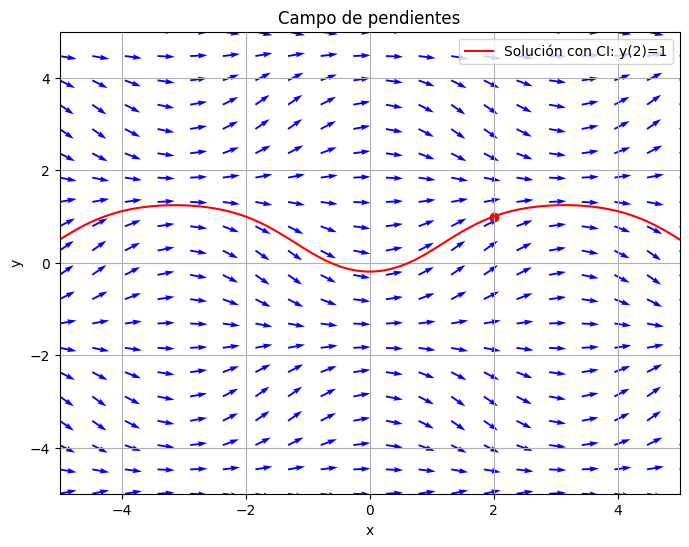

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definición de la EDO
def f(x, y):
    return np.sin(x)*np.cos(y) #Se puede cambiar arbitrariamente

# Definir la función para trazar el campo de pendientes y las soluciones.
def plot_slope_field(a, b, c, d, n, x0, y0=1):
    x = np.linspace(a, b, n)
    y = np.linspace(c, d, n)
    X, Y = np.meshgrid(x, y)
    U = 1
    V = f(X, Y)
    
    # Normalización de las flechas
    N = np.sqrt(U**2 + V**2)
    U2, V2 = U/N, V/N
    
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U2, V2, angles="xy", color="b")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de pendientes')
    plt.xlim([a, b])
    plt.ylim([c, d])
    plt.grid()
    
    # Resolución de la EDO con condición inicial en ambas direcciones.
    def ode_system(t, y):
        return f(t, y)
    
    # Hacia adelante en el tiempo
    t_span_forward = [x0, b]
    t_eval_forward = np.linspace(x0, b, 100)
    sol_forward = solve_ivp(ode_system, t_span_forward, [y0], t_eval=t_eval_forward)
    
    # Hacia atrás en el tiempo
    t_span_backward = [x0, a]
    t_eval_backward = np.linspace(x0, a, 100)
    sol_backward = solve_ivp(ode_system, t_span_backward, [y0], t_eval=t_eval_backward)
    
    # Gráfico de la solución
    plt.plot(sol_forward.t, sol_forward.y[0], 'r', label=f'Solución con CI: y({round(x0,2)})={round(y0,2)}')
    plt.plot(sol_backward.t, sol_backward.y[0], 'r')
    plt.scatter([x0], [y0], color='red')  # Condición inicial
    plt.legend()
    plt.show()
plot_slope_field(a=-5, b=5, c=-5, d=5, n=20, x0=2, y0=1)

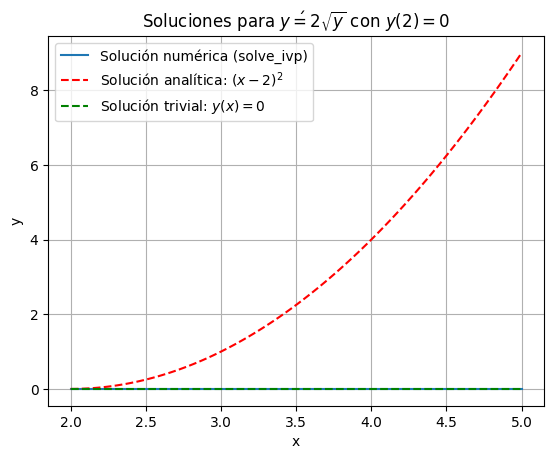

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos la función f(x, y)
def f(x, y):
    return 2 * np.sqrt(y)

# Condiciones iniciales
x0 = 2
y0 = 0

# Intervalo de integración
x_span = [x0, 5]

# Resolver la EDO usando solve_ivp
sol = solve_ivp(f, x_span, [y0], method='RK45', t_eval=np.linspace(x0, 5, 100))

# Solución analítica: y(x) = (x - 2)^2
x = np.linspace(2, 5, 100)
y_analitica = (x - 2)**2

# Solución trivial: y(x) = 0
y_trivial = np.zeros_like(x)

# Visualizar las soluciones
plt.plot(sol.t, sol.y[0], label='Solución numérica (solve_ivp)')
plt.plot(x, y_analitica, 'r--', label='Solución analítica: $(x-2)^2$')
plt.plot(x, y_trivial, 'g--', label='Solución trivial: $y(x) = 0$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Soluciones para $y\' = 2\sqrt{y}$ con $y(2) = 0$')
plt.legend()
plt.grid(True)
plt.show()

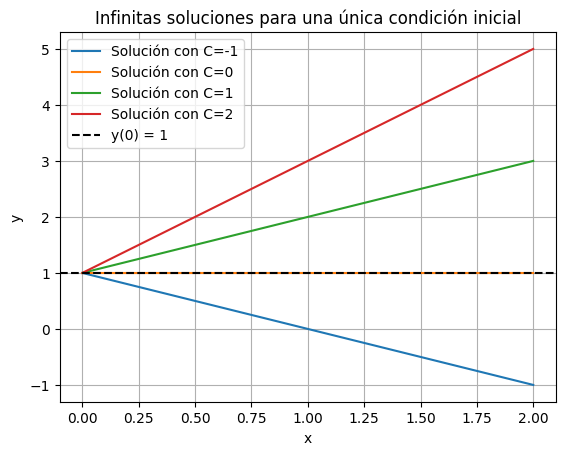

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x, y)
def f(x, y):
    # Evitamos la división por cero para x = 0
    return np.divide(y-1, x, out=np.zeros_like(x), where=x!=0)

# Condiciones iniciales
x0 = 0
y0 = 1

# Intervalo de integración
x = np.linspace(x0, 2, 100)

# Soluciones para diferentes valores de C
C_vals = [-1, 0, 1, 2]
sols = [1+C * x for C in C_vals]

# Visualizar las soluciones
for i, y_sol in enumerate(sols):
    plt.plot(x, y_sol, label=f'Solución con C={C_vals[i]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Infinitas soluciones para una única condición inicial')
plt.axhline(1, color='black', linestyle='--', label='y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()


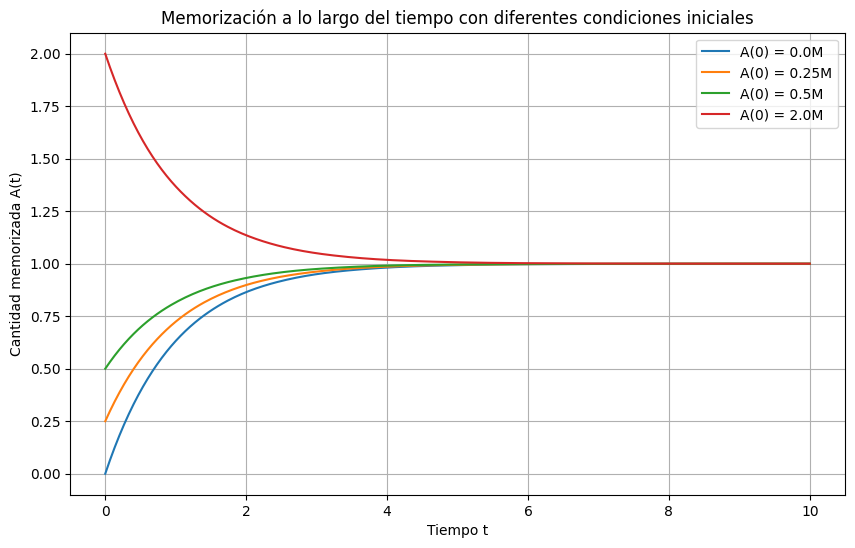

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
# Cantidad total a memorizar
M = 1 
# Valor fijo de la constante de proporcionalidad
k = 1  

# Diferentes condiciones iniciales
A0_values = [0*M, 0.25*M, 0.5*M, 2*M]

# Definición de la ecuación diferencial
def dA_dt(t, A, k):
    return k*(M-A)

# Tiempo de integración
t_eval = np.linspace(0, 10, 300)

# Resolver y graficar para diferentes condiciones iniciales
plt.figure(figsize=(10, 6))

for A0 in A0_values:
    sol = solve_ivp(dA_dt, [0, 10], [A0], args=(k,), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'A(0) = {A0/M}M')

# Configuración del gráfico
plt.title('Memorización a lo largo del tiempo con diferentes condiciones iniciales')
plt.xlabel('Tiempo t')
plt.ylabel('Cantidad memorizada A(t)')
plt.legend()
plt.grid(True)
plt.show()


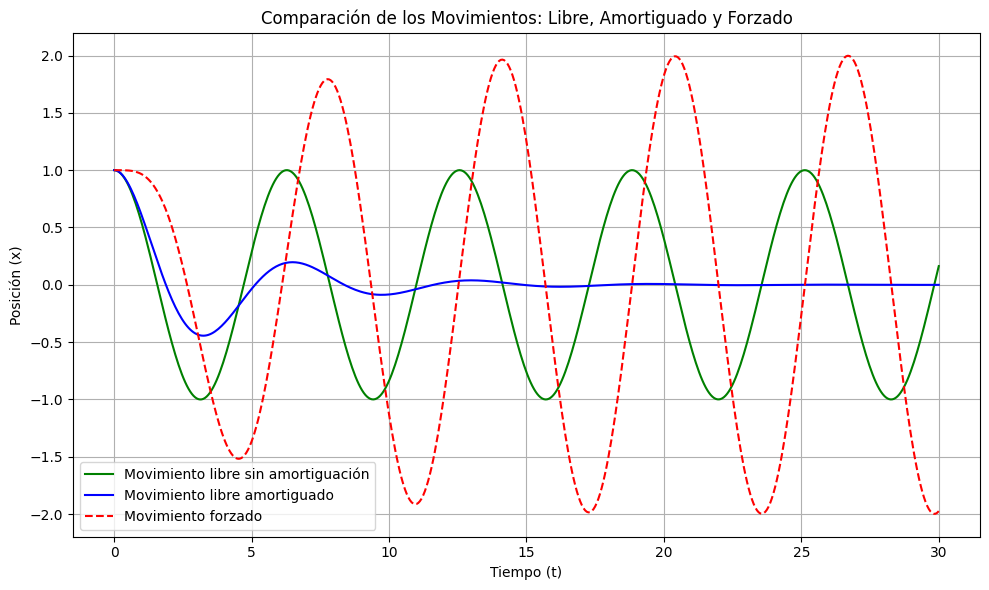

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0   # masa
k = 1.0   # constante del resorte
beta = 0.5   # coeficiente de amortiguamiento
F0 = 1  # amplitud de la fuerza externa (puede ser 0 si no hay fuerza externa)
gamma = 1.0  # frecuencia de la fuerza externa

# Definir el sistema de ecuaciones diferenciales: Una EDO de 2do orden se "separa" como un sistema para aplicar el
#el comando solve_ivp
def masa_resorte(t, y, m, k, beta, F0, gamma):
    x, v = y
    dxdt = v
    dvdt = -(k/m) * x - (beta/m) * v + (F0/m) * np.cos(gamma * t) #Fuerza externa F0*cos(gamma*t): se puede cambiar
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [1.0, 0.0]  # posición inicial x(0)=1, velocidad inicial x'(0)=0

# Tiempo de simulación
t_span = (0, 30)
t_eval = np.linspace(*t_span, 500)

# Resolver las ecuaciones diferenciales para los tres casos
sol_libre_sin_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, 0, 0, 0), t_eval=t_eval)
sol_libre_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, 0, 0), t_eval=t_eval)
sol_forzado = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, F0, gamma), t_eval=t_eval)

# Graficar los resultados en un mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(sol_libre_sin_amort.t, sol_libre_sin_amort.y[0], label='Movimiento libre sin amortiguación', color='green')
plt.plot(sol_libre_amort.t, sol_libre_amort.y[0], label='Movimiento libre amortiguado', color='blue')
plt.plot(sol_forzado.t, sol_forzado.y[0], label='Movimiento forzado', linestyle='dashed', color='red')

plt.title('Comparación de los Movimientos: Libre, Amortiguado y Forzado')
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
import sympy as sp

# Definir la variable independiente y la función dependiente
t = sp.Symbol('t')
y = sp.Function('y')(t)

# Definir la ecuación diferencial no homogénea
edo_no_homogenea = sp.Eq(2*y.diff(t, 2) - 3*y.diff(t) + 4*y, 0)

# Resolver la ecuación diferencial no homogénea
solucion_no_homogenea = sp.dsolve(edo_no_homogenea)

# # Mostrar la solución general
print("Solución de la EDO no homogénea:")
display(solucion_no_homogenea)

Solución de la EDO no homogénea:


Eq(y(t), (C1*sin(sqrt(23)*t/4) + C2*cos(sqrt(23)*t/4))*exp(3*t/4))